In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
%pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 1.6 MB/s eta 0:00:00


In [3]:
%pip install unidecode

In [4]:
%unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [5]:
#----------SKLEARN--------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV


from sklearn.cluster import KMeans , AgglomerativeClustering, DBSCAN
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer,ClusteringScoreVisualizer
from sklearn.metrics import silhouette_score


#-------NLTK--------------
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from unidecode import unidecode
from contractions import fix
from nltk.util import ngrams

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from wordcloud import WordCloud

#-------TENSORFLOW---------
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Input, SimpleRNN, LSTM , GRU, Bidirectional, Embedding
from keras.layers import Dropout

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from keras.utils import to_categorical

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

import pytesseract
import re

from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

## E-Mail Document

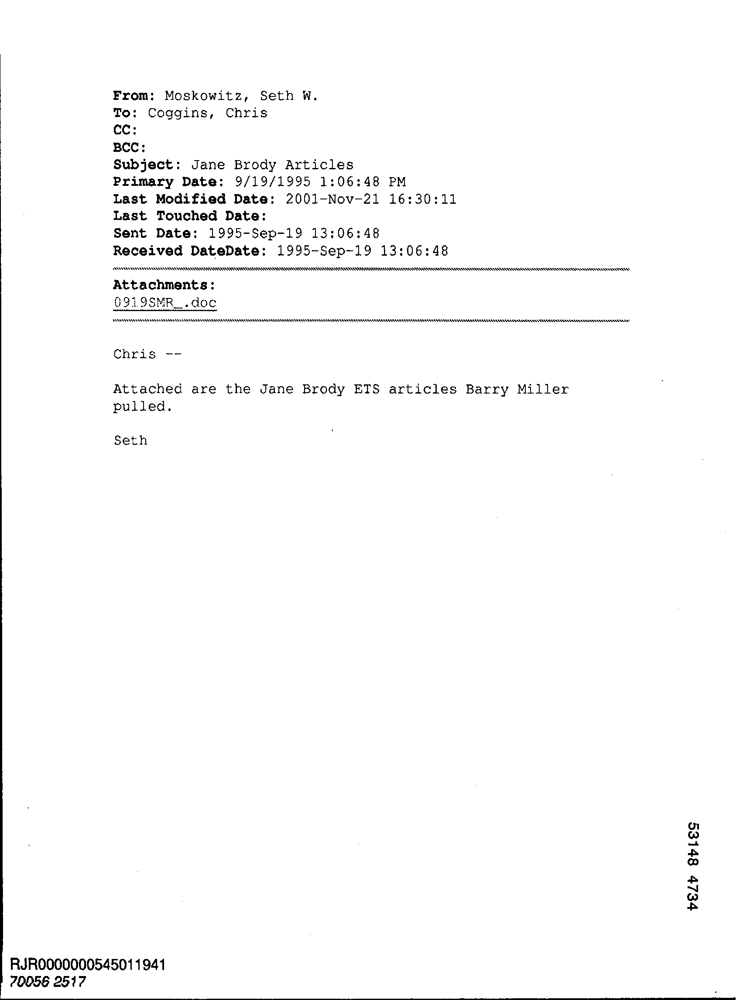

In [7]:
path = "/kaggle/input/document-classification-dataset/email/doc_000042.png"
image = Image.open(path)
image

## Resume

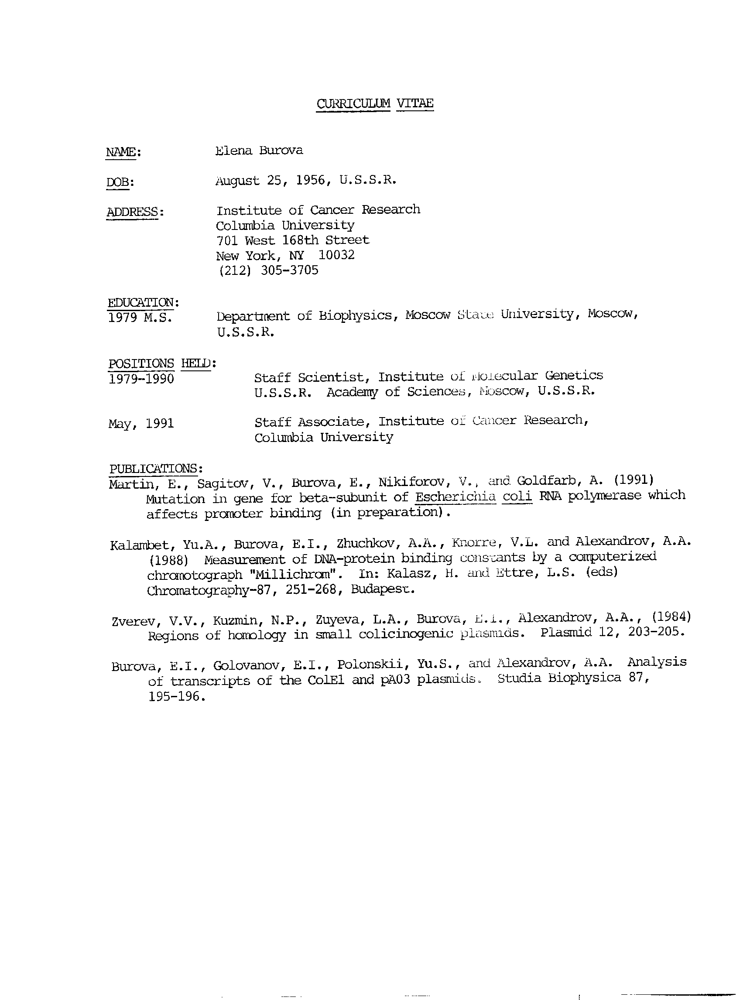

In [8]:
path = "/kaggle/input/document-classification-dataset/resume/doc_000051.png"
image = Image.open(path)
image

## Scientific Publication

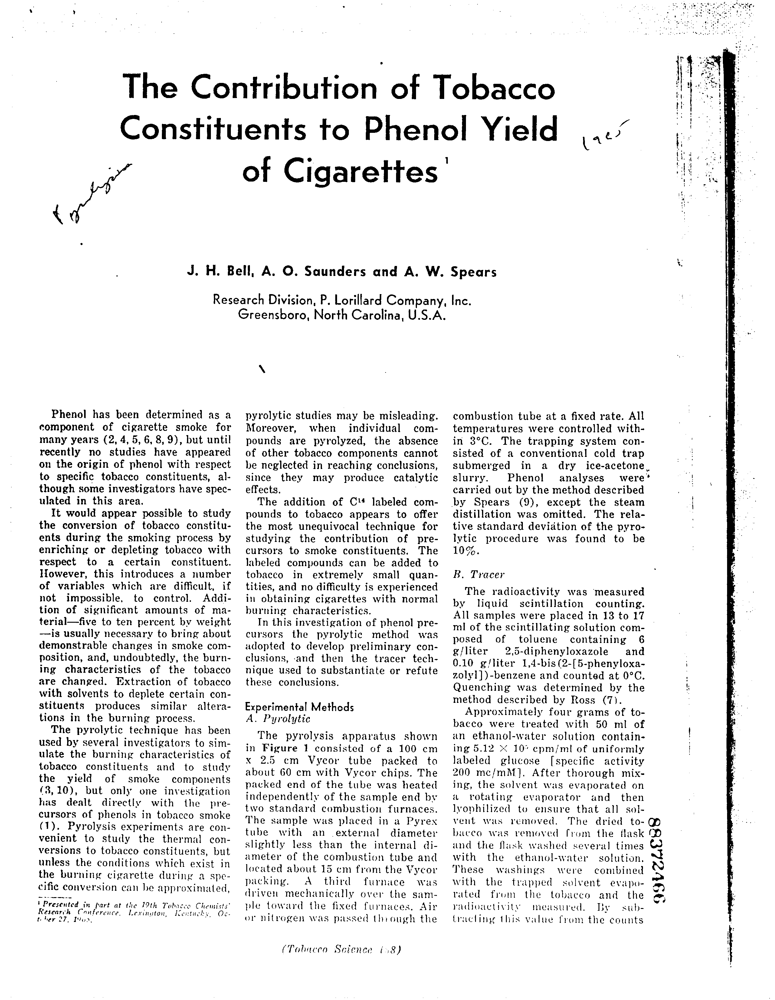

In [9]:
path = "/kaggle/input/document-classification-dataset/scientific_publication/doc_000016.png"
image = Image.open(path)
image

In [10]:
text = pytesseract.image_to_string(image)
text

' \n\nThe Contribution of Tobacco\nConstituents to Phenol Yield |..*\nof Cigarettes’\n\n \n\n4\n\nJ. H. Bell, A. ©. Saunders and A. W. Spears\n\n \n\nResearch Division, P. Lorillard Company, Inc.\nGreensboro, North Carolina, U.S.A.\n\nPhenol has been determined as a pyrolytic studies may be misleading. combustion tube at a fixed rate. All\ncomponent of cigarette smoke for Moreover, when individual com- temperatures were controlled with-\nmany years (2,4,5,6,8,9), but until pounds are pyrolyzed, the absence in 3°C. ‘The trapping system con-\nrecently no studies ‘have appeared of other tobacco components eannot sisted of a conventional cold trap\n‘on the origin of phenol with respect ye neglected in reaching conclusions, submerged in a dry. ice-acetons\nto specific tobaceo constituents, al- since they may produce catalytic slurry. Phenol analyses were™ 1\nthough some investigators have spec- effects carried out by the method described\nulated in this area. ‘The addition of C¥* labeled co

In [11]:
stopwords_list = stopwords.words("english")
#stopwords_list

## Data Preprocessing

In [12]:
def preprocess_data(text):
    text = text.lower()
    text = text.replace("\n"," ").replace("\t"," ")
    text = re.sub("\s+"," ",text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    
    # tokens
    tokens = word_tokenize(text)
    
    data = [i for i in tokens if i not in punctuation]
    data = [i for i in data if i not in stopwords_list]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    final_text = []
    for i in data:
        word = lemmatizer.lemmatize(i)
        final_text.append(word)
        
    return " ".join(final_text)

#preprocess_data(text)

In [13]:
import os

class_labels = {'email':0,'resume':1,'scientific_publication':2}

final_text = []
final_label = []
path = "/kaggle/input/document-classification-dataset"
image_folder = os.listdir(path)

for label in image_folder:
        #print(label)
        label_path = os.path.join(path,label)
        for j in os.listdir(label_path):
            #print(j)
            image = Image.open(label_path+"/"+j)
            #print(image)
            text = pytesseract.image_to_string(image)
            text_data = preprocess_data(text)
            
            final_text.append(text_data)
            final_label.append(class_labels[label])
        

In [14]:
df = pd.DataFrame()
df['Text'] = final_text
df['Label'] = final_label
df

,Text,Label
0,biographical sketch give th following informat...,1
1,oe pic eee isons secundary educktion sintpiéte...,1
2,biographical sketch research assistant name th...,1
3,curriculum vitae personal data surname bell fi...,1
4,biographical sketch name last first initial ti...,1
...,...,...
160,copyrgit te eran aazonon tinea production char...,2
161,lary niet direct nicotinic receptor mediated i...,2
162,teer researen te mwas rau ner re cone wee nse ...,2
163,nate determination tetrahydroisoquin material ...,2


In [15]:
df.iloc[110]

Text     ji technical paper poe w wk asm ie w come aba ...
Label                                                    2
Name: 110, dtype: object

In [16]:
df['Text'][110]

'ji technical paper poe w wk asm ie w come aba aagreracaion study environmental tobacco smoke generated different cigarette paul r nelson susan p kelly fred w conrad rj reynolds tobacco company bowman gray technical center winstonsalem north carolina abstract method developed reproducibly measure envi ronmental tobacco smoke ets component generated different cigarette measurement carried unventilated controlled environment chamber true ets aged diluted combination exhaled main steam plus sidestream smoke generated human smoker reliably quantitate component normally resent trace jevels compatisons cartied elevated ets concenteationsgreater tine typically encountered realworld setting method applied four commercially aval able cigarette cigarette prototype primarily heat tobacco fortythree property component gas particulate phase ets generated different cigarette measured good precision measurement obtained within te statistically significant difference concencration ets component observ

## Target Labels Analysis

In [17]:
df['Label'].value_counts()

Label
1    55
0    55
2    55
Name: count, dtype: int64

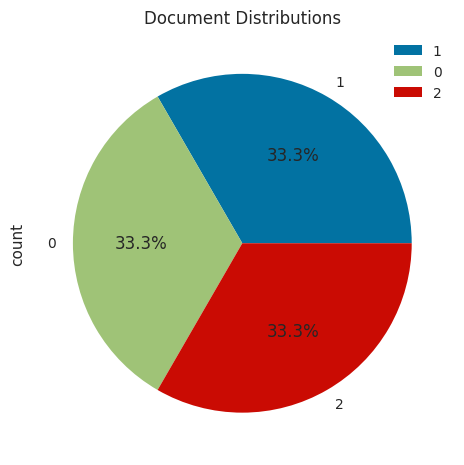

In [18]:
df['Label'].value_counts().plot(kind='pie',autopct="%.1f%%")
plt.title("Document Distributions")
plt.legend()
plt.show()

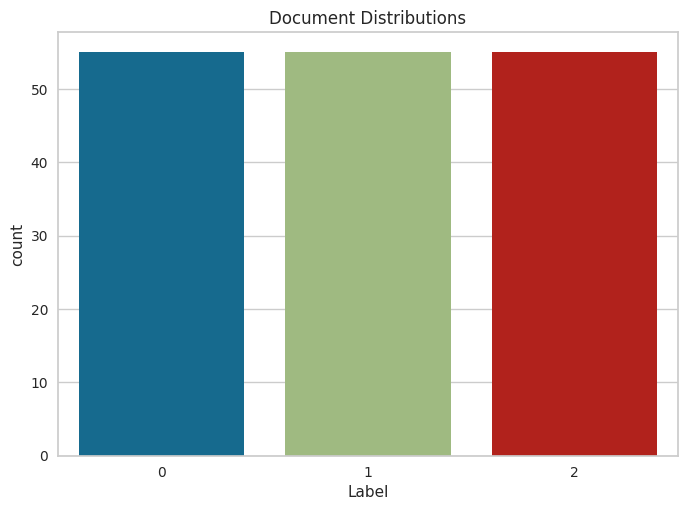

In [19]:
sns.countplot(x=df['Label'])
plt.title("Document Distributions")
plt.show()

In [20]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,auc,roc_curve,precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

## Split The Data

In [21]:
x_train,x_test,y_train,y_test = train_test_split(df['Text'],df['Label'],shuffle=True,test_size=0.10)
print(x_train.shape)
print(x_test.shape)

(148,)
(17,)


In [22]:
x_train

2      biographical sketch research assistant name th...
152    revised archces international de pharmacodynam...
54     principal investigatoriphogram virecior dr gah...
153    buropban journal drug metabolism pharmacokinet...
40     sfoau curriculum vitae harmon c mcallister jr ...
                             ...                        
85     kinser robind putney rebecca friday september ...
66     teitelbaum shari thu jul subject july th meeti...
6      principal investigatorprogram director biograp...
48     r redacted material william h beer redacted is...
95     ovignal massage moor tamara sent monday cider ...
Name: Text, Length: 148, dtype: object

In [23]:
y_train

2      1
152    2
54     1
153    2
40     1
      ..
85     0
66     0
6      1
48     1
95     0
Name: Label, Length: 148, dtype: int64

## TfidfVectorizer

In [24]:
tfidf = TfidfVectorizer(ngram_range=(2,5), max_df=0.95, min_df=2 ,max_features=10000)
tfidf_train = tfidf.fit_transform(x_train)
tfidf_test = tfidf.transform(x_test)

In [25]:
tfidf_train.A.shape

(148, 1698)

## Model Building

### LogisticRegression

In [26]:
model = LogisticRegression()
model.fit(tfidf_train.A,y_train)

LogisticRegression()

In [27]:
y_pred = model.predict(tfidf_test.A)
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 1, 0])

In [28]:
y_pred_tr = model.predict(tfidf_train.A)
y_pred_tr

array([1, 2, 1, 2, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 2, 2, 0, 0, 0, 2, 1,
       2, 2, 2, 1, 2, 1, 1, 1, 0, 1, 1, 2, 2, 1, 2, 0, 2, 1, 0, 2, 1, 2,
       2, 2, 2, 2, 0, 1, 2, 1, 2, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2, 0, 0, 2,
       0, 1, 0, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 2, 0, 0, 1, 0, 1, 0, 2,
       0, 0, 0, 2, 2, 1, 0, 0, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 0, 0, 2,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 2, 1, 2, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1,
       2, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0])

## Model Evaluation

In [29]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print()
print("Classification Report:\n",classification_report(y_test,y_pred))

Confusion Matrix:
 [[2 0 4]
 [0 3 0]
 [0 1 7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.75      1.00      0.86         3
           2       0.64      0.88      0.74         8

    accuracy                           0.71        17
   macro avg       0.80      0.74      0.70        17
weighted avg       0.78      0.71      0.67        17



In [30]:
print("Confusion Matrix:\n",confusion_matrix(y_train,y_pred_tr))
print()
print("Classification Report:\n",classification_report(y_train,y_pred_tr))

Confusion Matrix:
 [[44  0  5]
 [ 0 51  1]
 [ 0  0 47]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        49
           1       1.00      0.98      0.99        52
           2       0.89      1.00      0.94        47

    accuracy                           0.96       148
   macro avg       0.96      0.96      0.96       148
weighted avg       0.96      0.96      0.96       148



In [31]:
print(f"Accuracy on Test Data: {accuracy_score(y_test,y_pred)*100:.2f} %")
print(f"Accuracy on Train Data: {accuracy_score(y_train,y_pred_tr)*100:.2f} %")

Accuracy on Test Data: 70.59 %
Accuracy on Train Data: 95.95 %


### LogisticRegression

In [32]:
lg_model = LogisticRegression(max_iter=2000,solver='liblinear',C=100)
lg_model.fit(tfidf_train.A,y_train)

LogisticRegression(C=100, max_iter=2000, solver='liblinear')

In [33]:
y_pred = lg_model.predict(tfidf_test.A)
y_pred

array([0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 1, 0, 1, 2, 1, 1, 0])

In [34]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print()
print("Classification Report:\n",classification_report(y_test,y_pred))

Confusion Matrix:
 [[6 0 0]
 [0 3 0]
 [0 1 7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.75      1.00      0.86         3
           2       1.00      0.88      0.93         8

    accuracy                           0.94        17
   macro avg       0.92      0.96      0.93        17
weighted avg       0.96      0.94      0.94        17



In [35]:
print(f"Accuracy on Test Data: {accuracy_score(y_test,y_pred)*100:.2f} %")

Accuracy on Test Data: 94.12 %


In [36]:
y_test.values

array([0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 1, 2, 1, 1, 0])

## Pickle File For Deployment

In [37]:
import pickle
import json

In [38]:
class_labels

{'email': 0, 'resume': 1, 'scientific_publication': 2}

In [39]:
# Class_labels
label_data = ['email', 'resume' ,'scientific_publication']

In [40]:
with open("model.pickle","wb") as file:
    pickle.dump(model,file)

In [41]:
with open("tfidf.pickle","wb") as file1:
    pickle.dump(tfidf,file1)

In [42]:
with open("new_model.pickle","wb") as file2:
    pickle.dump(lg_model,file2)